# Learning stim

Stim is a package performin simulation of quantum circuits. It work much faster than the qiskit, but cannot simulate complicated non-Clifford gates. Stim is used to analyze error correction codes. 

It has additional features such as stabilizer tableau analysis.

Here is a tutorial video on how to use stim: https://www.youtube.com/watch?v=sprDaLxPVNI

Here is the very useful GitHub page on the Stim: https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb

## Notes on Stim
1. One can use QASM intermediate representation to convert some of the Stim codes into the Qiskit codes. Note that for example error operators are not supported by stim.

In [3]:
#!pip install stim

In [4]:
import stim

circuit_string = "H 0 \n H 1 \n M 0 1"

c = stim.Circuit(circuit_string)
c = c + c
c_quasm = c.to_qasm(open_qasm_version=2)                

In [5]:
c_quasm

'OPENQASM 2.0;\ninclude "qelib1.inc";\n\nqreg q[2];\ncreg rec[4];\n\nh q[0];\nh q[1];\nmeasure q[0] -> rec[0];\nmeasure q[1] -> rec[1];\nh q[0];\nh q[1];\nmeasure q[0] -> rec[2];\nmeasure q[1] -> rec[3];\n'

In [6]:
res = c.compile_sampler().sample(10)

In [7]:
res

array([[False, False, False,  True],
       [False,  True, False,  True],
       [False, False, False, False],
       [ True, False, False,  True],
       [False,  True, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True, False],
       [False,  True, False,  True],
       [ True,  True, False,  True],
       [ True,  True,  True,  True]])

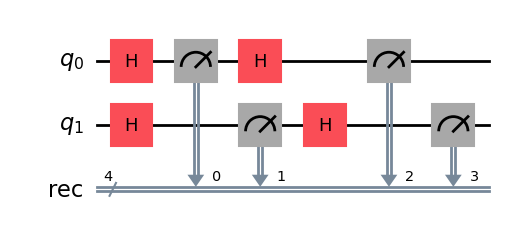

In [8]:
import qiskit
from qiskit import QuantumCircuit

circuit = QuantumCircuit.from_qasm_str(c_quasm)
circuit.draw('mpl')

In [9]:
qc_st422 = stim.Circuit()
qubits = range(6)

qc_st422.append_operation('CNOT', [0, 2])
qc_st422.append_operation('CNOT', [1, 2])
qc_st422.append_operation('H', [3])
qc_st422.append_operation('X_ERROR', [0, 1], 0.1)
qc_st422.append_operation('CNOT', [3, 2])
qc_st422.append_operation('CNOT', [3, 1])
qc_st422.append_operation('CNOT', [3, 0])



qc_st422.append_operation('H', [4])
qc_st422.append_operation('H', [5])
for i in range(4):
    qc_st422.append_operation('CZ', [4, i])
for i in range(4):
    qc_st422.append_operation('CNOT', [5, i])
qc_st422.append_operation('H', [4])
qc_st422.append_operation('H', [5])
qc_st422.append_operation('MR', [4,5])


#c_quasm = qc_st422.to_qasm(open_qasm_version=2)

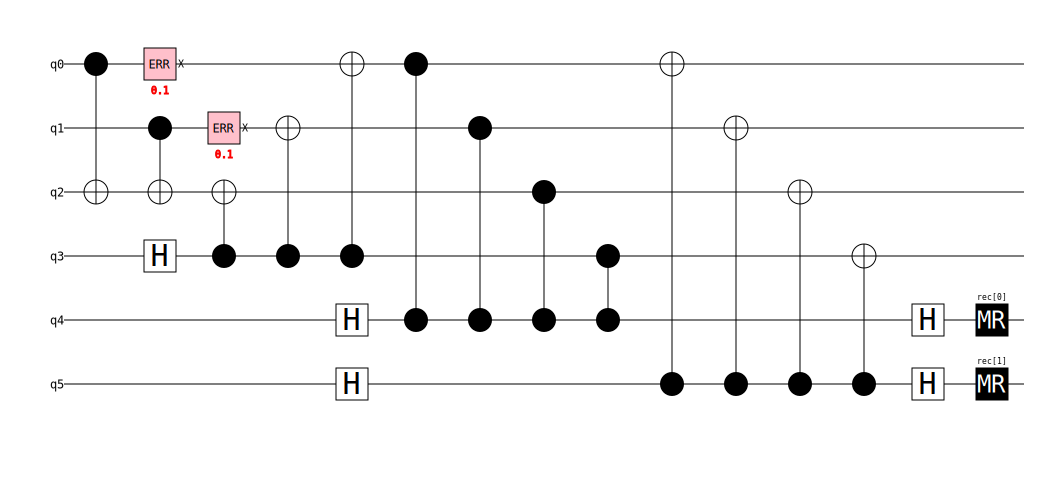

In [10]:
qc_st422.diagram('timeline-svg')

In [11]:
res = qc_st422.compile_sampler().sample(10)

In [12]:
res

array([[False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

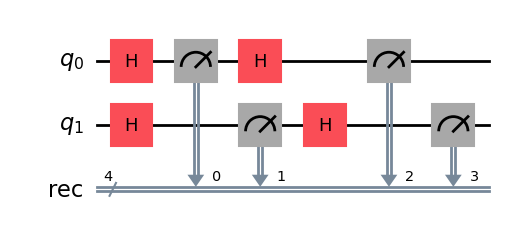

In [13]:
circuit = QuantumCircuit.from_qasm_str(c_quasm)
circuit.draw('mpl')